In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
#for removing warnings
import warnings

In [63]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-u.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
du = xr.open_zarr(store=store, consolidated=True)
du = du.rename({'depthu' : 'depth'})
du 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables

In [134]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [135]:
ds = open_s3fs('PC-data')

In [137]:
u = du.vozocrtx.isel(y=slice(900,1800), x=slice(200,1400))
#v = dv.vomecrty.isel(y=slice(900,1800), x=slice(200,1400))
mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))

In [126]:
def dyp(depth): 
    depth = int(depth)
    dyp = np.zeros(depth, dtype=int)
    #d = du.depth.isel(depth=depth).values
    for i in range(len(dyp)):
        d = du.depth[i].values #gdepth_1d
        dyp[i] = d
    return dyp  

In [32]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://data/PCz.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
pc = xr.open_zarr(store=store, consolidated=True)
pc = pc.rename_dims({'dim_0': 'x_', 'dim_1': 'y_'})
pc 

<xarray.Dataset>
Dimensions:  (x_: 1200, y_: 900)
Dimensions without coordinates: x_, y_
Data variables:
    PC11     (x_, y_) float64 dask.array<chunksize=(300, 225), meta=np.ndarray>
    PC12     (x_, y_) float64 dask.array<chunksize=(300, 225), meta=np.ndarray>
    depth    (x_, y_) float64 dask.array<chunksize=(300, 225), meta=np.ndarray>
    x        int64 ...
    y        int64 ...

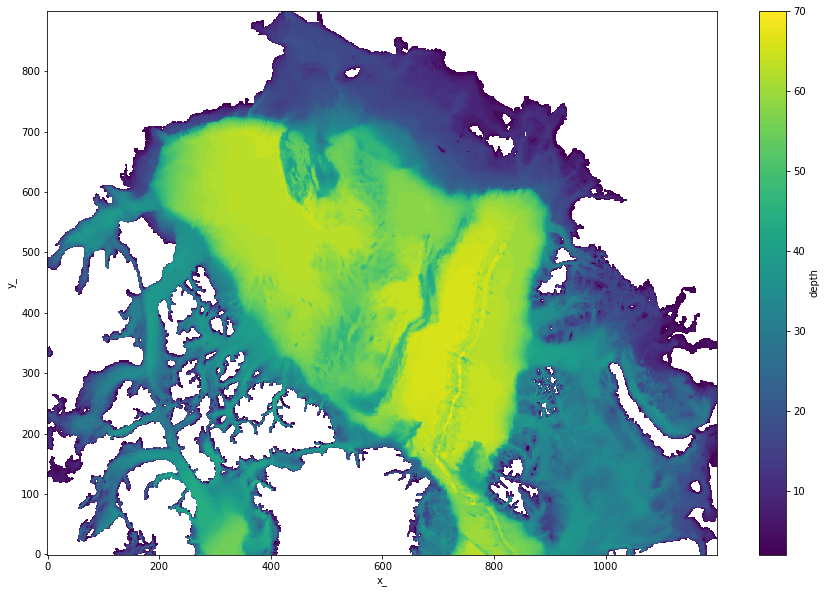

In [39]:
pc.depth.T.plot(figsize = (15,10))

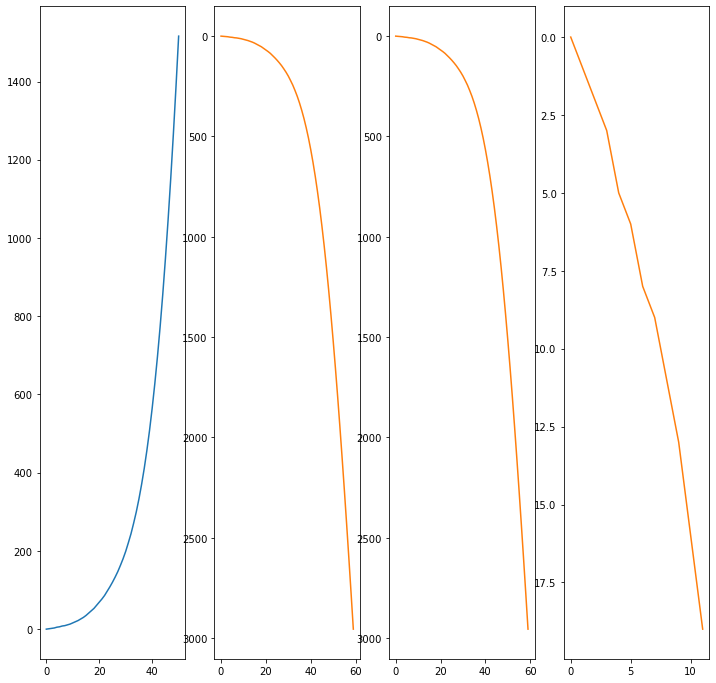

In [133]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,12))

#ax1.plot(pc.PC11.isel(x_=380,y_=400),pc.PC12.isel(x_=380,y_=400), dyp(pc.depth.isel(x_=380,y_=400).values))
ax1.plot(dyp(pc.depth.isel(x_=380,y_=400).values))
#ax1.invert_yaxis()
ax4.plot(pc.PC11.isel(x_=660,y_=790),pc.PC12.isel(x_=660,y_=790), dyp(pc.depth.isel(x_=660,y_=790).values) )
ax4.invert_yaxis()
ax3.plot(pc.PC11.isel(x_=300,y_=700),pc.PC12.isel(x_=300,y_=700), dyp(pc.depth.isel(x_=300,y_=700).values) )
ax3.invert_yaxis()
ax2.plot(pc.PC11.isel(x_=500,y_=500),pc.PC12.isel(x_=500,y_=500), dyp(pc.depth.isel(x_=500,y_=500).values) )
ax2.invert_yaxis()


# tester med et punkt 

In [ ]:
x_p = 500
y_p = 500 

'Finding the level the given location dosent have values for anymore'

mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))
d = mbathy.isel(x=x_p, y=y_p).values

dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
punkter = dyp.reduce(5)

cov_p = np.cov(dyp.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov_p)
order = values.argsort()[::-1]
values, vectors = values[order], vectors[:, order]

print(cov_p.shape) 
print(cov_p)
print('------------------------------------------------------')    
print(values[0]) 
print('------------------------------------------------------')    
print(values[1])
print('------------------------------------------------------')    
print(vectors[0])    